<center><img src="https://articles-1mg.gumlet.io/articles/wp-content/uploads/2016/12/rsz_shutterstock_258753287.jpg?compress=true&quality=80&w=640&dpr=2.6" style="width: 800px;"/>

# Bio-Signal Analysis for Smoking

## Problem Statement:

You are working as a data scientist in a global company. Over the years, the company has  collected details and gathered a lot of information about individuals. The management wants to build an intelligent system from the data to determine the presence or absence of smoking in a person through bio-signals. Given a person’s information, build a machine learning model that can classify the presence or absence of smoking.


### Importing the Libraries

We start off this project by importing all the necessary libraries that will be required for the process.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# numpy & pandas
import numpy as np
import pandas as pd
import math 

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Other libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

#machine learning models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

### Loading the Data
Loading the data and removing the irrelevant columns.

In [2]:
df = pd.read_csv('smoking.csv')

In [3]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
df.shape

(55692, 27)

**Insight** = This dataset is a collection of basic health biological signal data which contains around 55K record with 27 attributes.

### Dataset Information:

**Attributes**    =           **Description**

+ ID =                        index
+ gender =                    gender of a person (M or F)
+ age   =                     age of a person (5-years gap)
+ height(cm)  =               height of a person 
+ weight(kg)  =               weight of a person
+ waist(cm)    =              waist circumference length
+ eyesight(left) =            left eyesight
+ eyesight(right)  =          right eyesight
+ hearing(left)   =           hearing pulse in left ear 
+ hearing(right)  =           hearing pulse in right ear
+ systolic       =            Blood pressure
+ relaxation         =        Blood pressure
+ fasting blood sugar  =      Blood test
+ Cholesterol          =      total
+ triglyceride    =           Lipid found in blood
+ HDL         =               cholesterol type
+ LDL          =              cholesterol type
+ hemoglobin    =             Transporting oxygen in blood
+ Urine protein =             Excess of bloodborne proteins in urine
+ serum creatinine=           Amount of creatinine in blood
+ AST         =               glutamic oxaloacetic transaminase type
+ ALT          =              glutamic oxaloacetic transaminase type
+ Gtp         =               γ-GTP
+ oral                       Oral Examination status
+ dental caries =             Tooth decay
+ tartar       =              tartar status
+ smoking      =              Smoker (0 or 1)


In [5]:
# dropping the unwanted columns 
df = df.drop(columns = ['ID','oral'])
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


#### Checking the shape of a dataframe and datatypes of all columns along with calculating the statistical data.


In [6]:
df.shape

(55692, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [8]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


#### Missing Values 
Checking out the missing values in a dataframe

In [9]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

**Insight** = There is no null value

### Data Visualization 

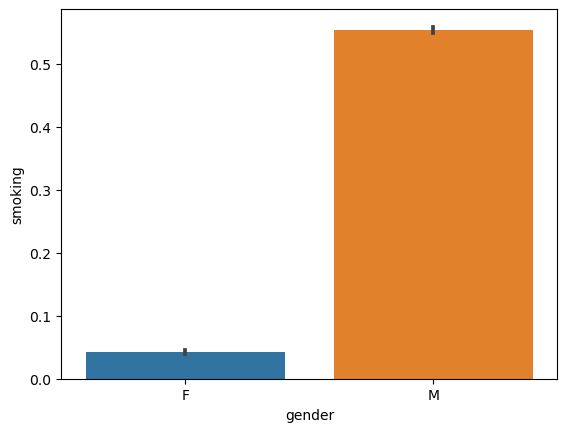

In [10]:
sns.barplot(x = df["gender"],y=df["smoking"])
plt.show()

<Axes: xlabel='gender', ylabel='count'>

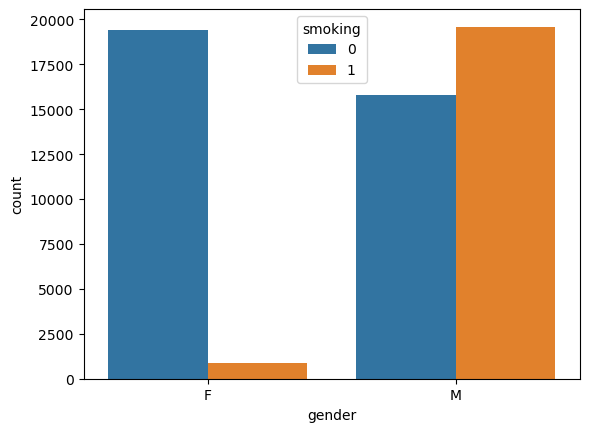

In [11]:
sns.countplot(x=df["gender"], hue=df["smoking"])

**Insight** = We can clearly see from the below graph that most smokers are men

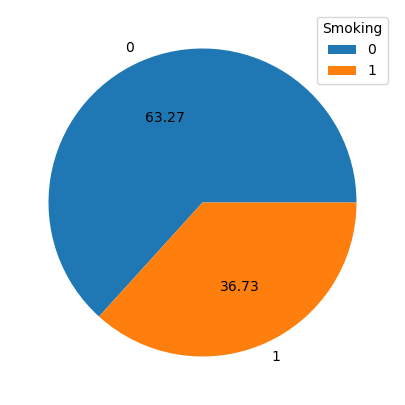

In [12]:
plt.figure(figsize=(10, 5))
values = df["smoking"].value_counts()
plt.pie(values, labels=values.index, autopct='%0.2f')
plt.legend(values.index, title="Smoking")
plt.show()

**Insight** = There are 36.73 percent of the people who are smoking ciggarette.

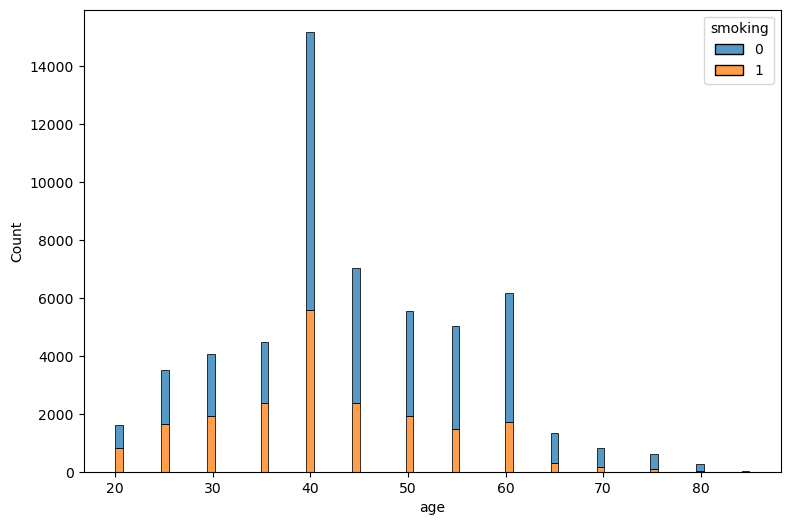

In [13]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df, x='age', hue='smoking', multiple="stack")
plt.show()

**Insight** = Most number of smokers are having the age 40

### Outlier detection:

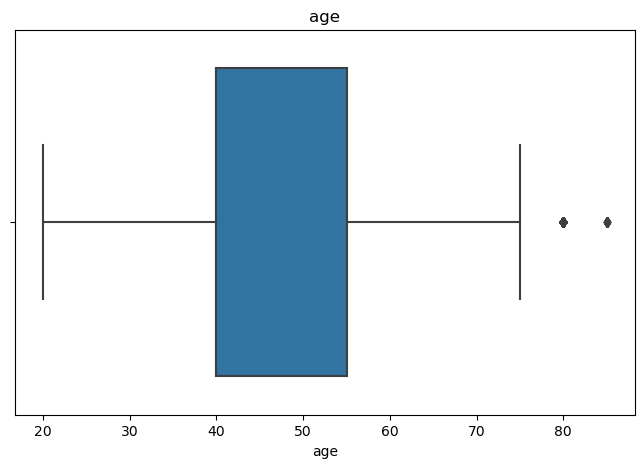

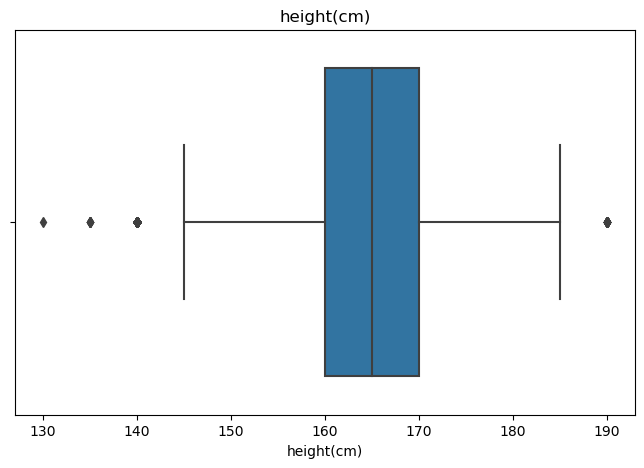

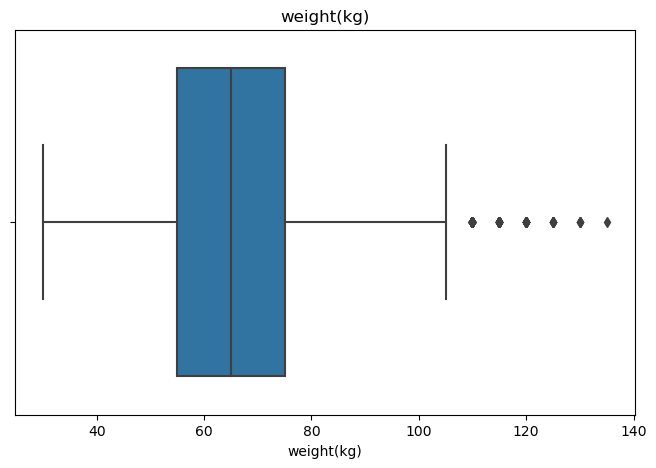

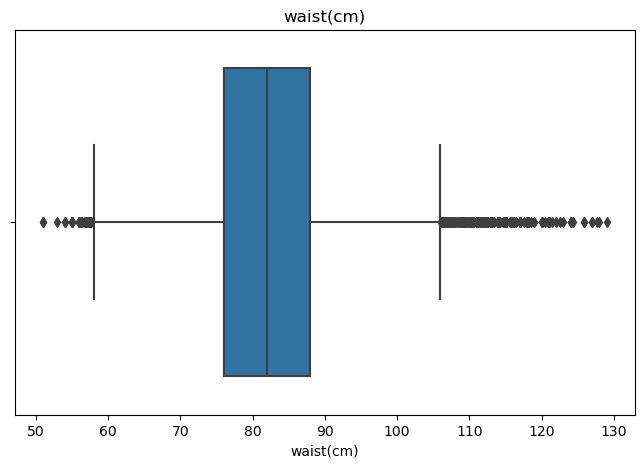

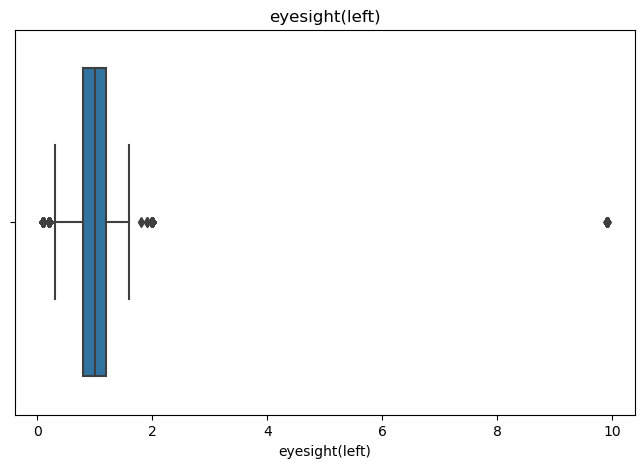

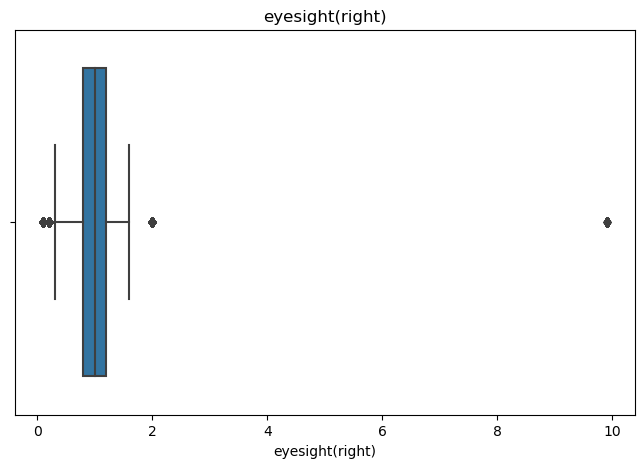

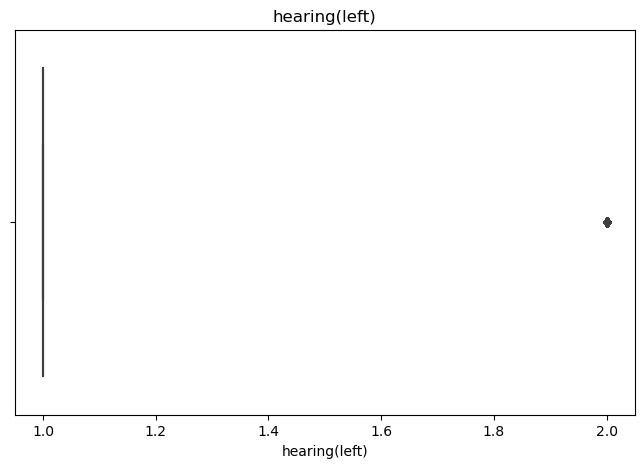

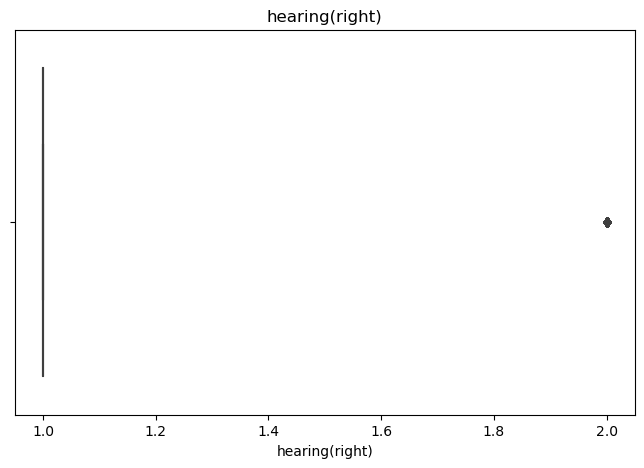

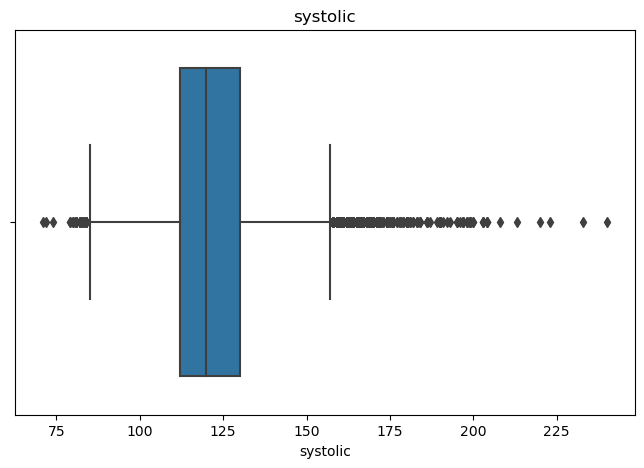

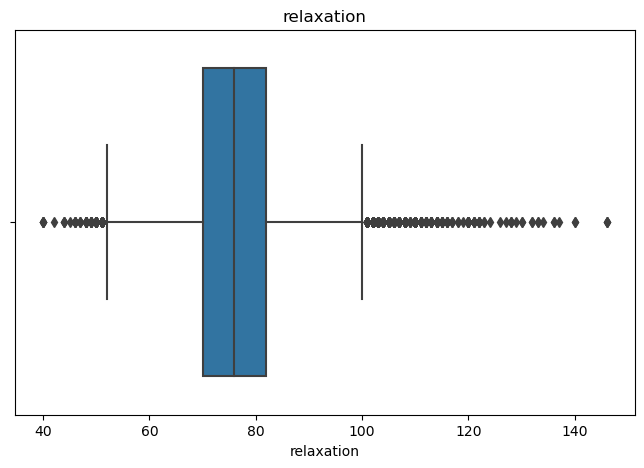

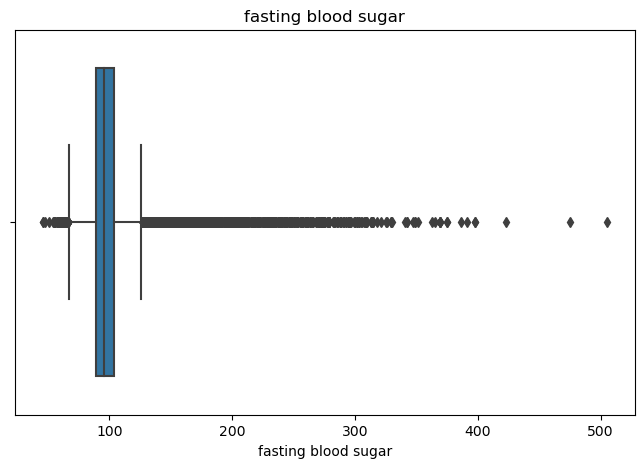

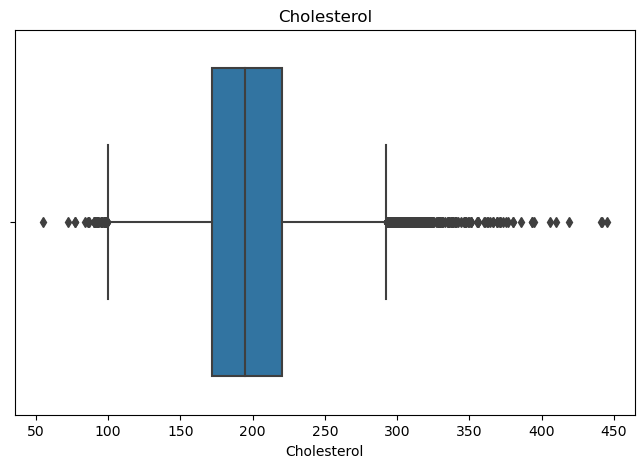

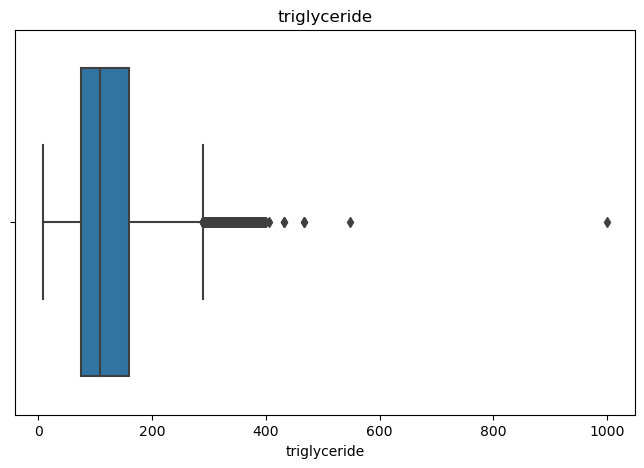

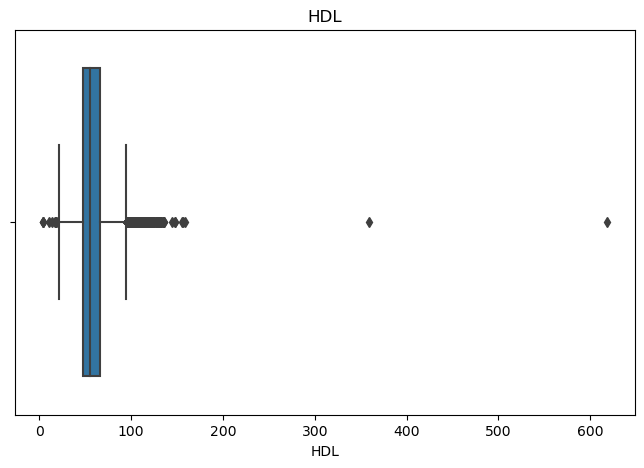

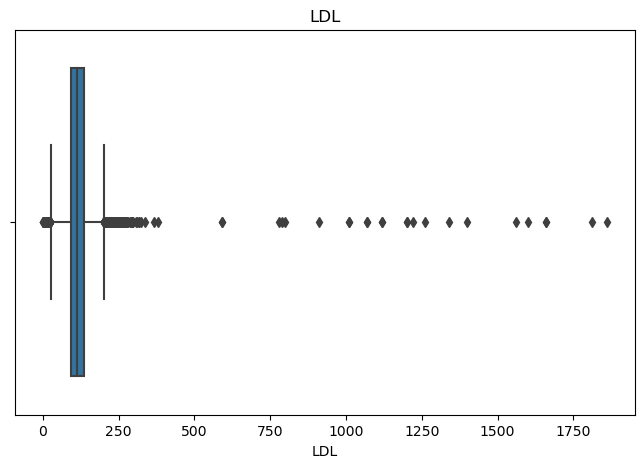

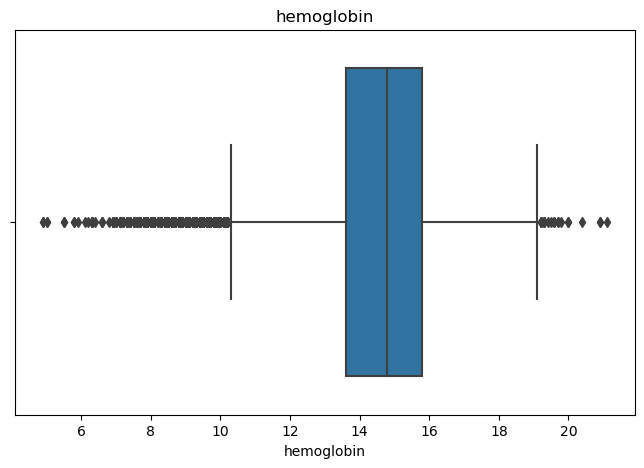

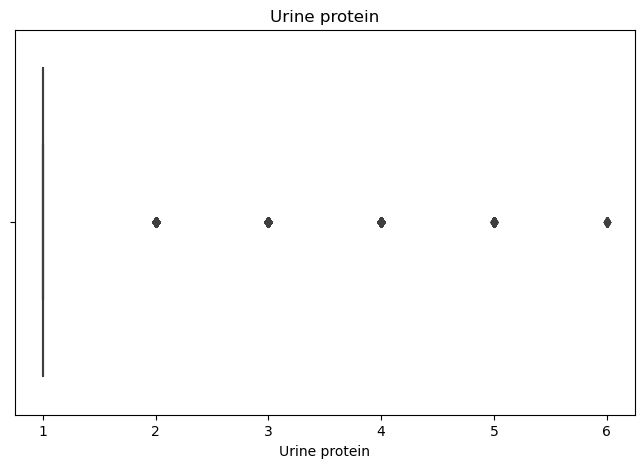

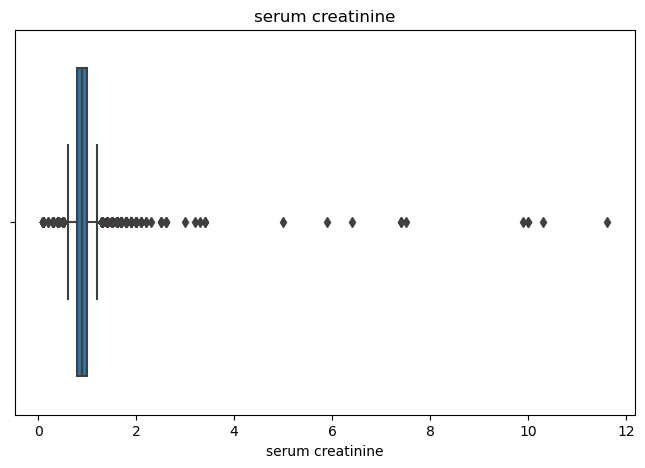

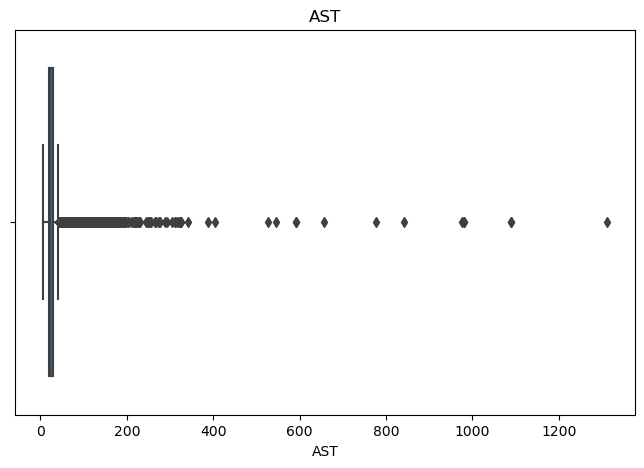

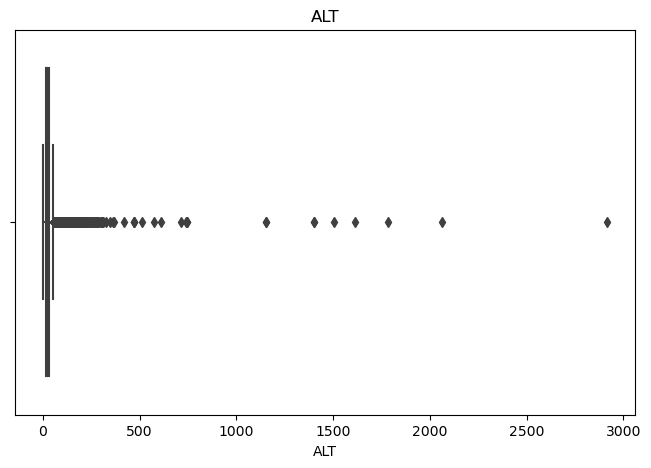

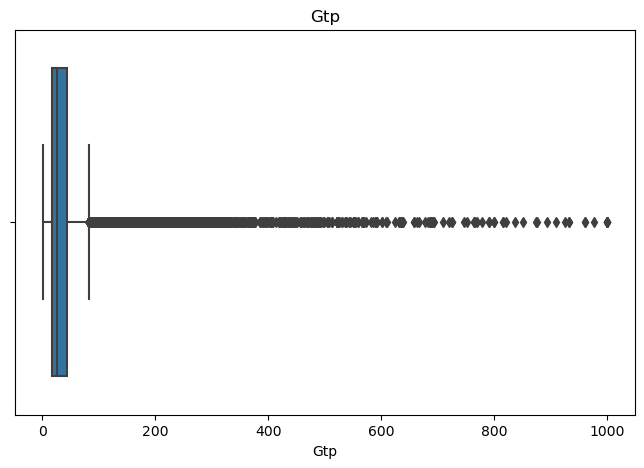

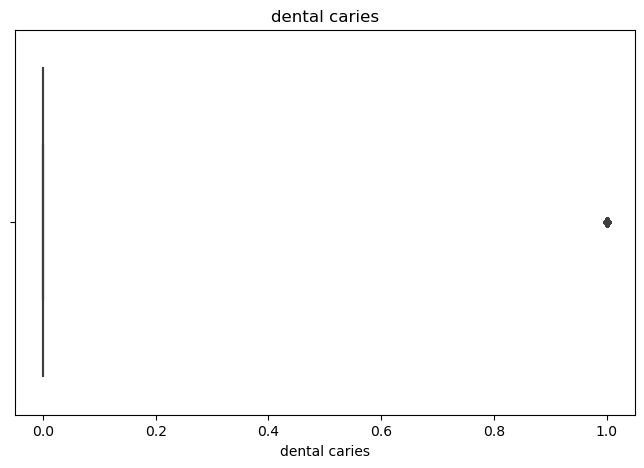

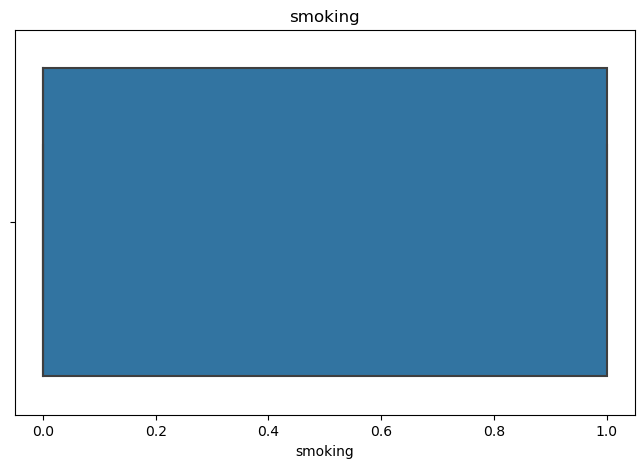

In [14]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()


**Representation of columns using boxplot to detect outliers. Here outliers represent natural 
variations in the population, and they should be left as is in the dataset. These are called true 
outliers. Therefore for this dataset we will not remove outliers.**

### Data Cleaning

In [15]:
# Performing One Hot Encoding for categorical features of a dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender']).astype('int64')
df['tartar'] = le.fit_transform(df['tartar']).astype('int64')
df['dental caries'] = le.fit_transform(df['dental caries']).astype('int64')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

### Feature selection using feature importance

Feature importance is a technique that calculate a score for all the input features for a given model. So out of 24 features we will select the top 15 features based on the score.


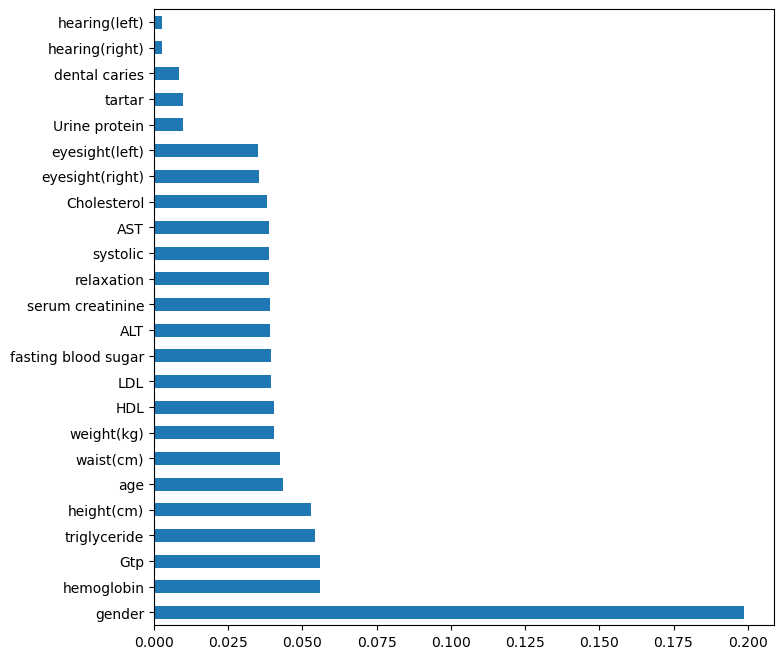

In [17]:
X = df.iloc[:,:-1]
y = df['smoking']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
df1 = pd.Series(model.feature_importances_,index = X.columns)
plt.figure(figsize = (8,8))
df1.nlargest(24).plot(kind = 'barh')
plt.show()

### Data Preparation

In [18]:
X = df[["gender","height(cm)","Gtp","hemoglobin","triglyceride","age","weight(kg)","waist(cm)","HDL","serum creatinine","ALT","fasting blood sugar","relaxation","LDL","systolic"]]
y = df["smoking"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

### Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [22]:
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred_lr = lr.predict(x_test)

In [24]:
# Calculating accuracy and generating the classification report of Logistic Regression
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred_lr)

0.7348954125145883

In [25]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7027
           1       0.63      0.69      0.66      4112

    accuracy                           0.73     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.73      0.74     11139



**Insight** = The accuracy of the logistic regression model is
73.48 percent


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred_dt = dt.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred_dt)

0.7821168866145973

In [30]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7027
           1       0.70      0.71      0.71      4112

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



**Insight** = The accuracy of the Decision Tree model is
78.21 percent

### Bagging Algorithm – Bagging Classifier

Bootstrap Aggregation or bagging involves taking multiple samples from the training dataset 
(with replacement) and training a model for each sample.

In [31]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=1000)

In [32]:
bagging_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)

In [33]:
y_pred_bagg = bagging_clf.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred_bagg)

0.8279019660651764

In [35]:
print(classification_report(y_test,y_pred_bagg))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



**Insight** = The accuracy of the Bagging Classifier model is
82.79 percent

### Bagging Algorithm – Extra Trees

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators = 1000, random_state = 42)

In [37]:
et.fit(x_train, y_train)

ExtraTreesClassifier(n_estimators=1000, random_state=42)

In [38]:
y_pred_et = et.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred_et)

0.8287997127210701

In [40]:
print(classification_report(y_test,y_pred_et))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7027
           1       0.75      0.82      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139



**Insight** = The accuracy of the Extra Trees model is
82.87 percent

### Bagging Algorithm – Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)

In [42]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [43]:
y_pred_rfc = rfc.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred_rfc)

0.8313134033575725

In [45]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.81      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139



**Insight** = The accuracy of the Random Forest model is
83.13 percent

### Conclusion: 

#### Gender Analysis:

The graph shows that a higher proportion of smokers are men compared to women.

#### Smoking Percentage:
Approximately 36.73% of the population in the dataset are smokers.

#### Age Distribution:
The age distribution indicates that the majority of smokers fall in the age group around 40 years.

#### Model Accuracies:
+ The logistic regression model achieves an accuracy of 73.48%.
+ The decision tree model achieves an accuracy of 78.21%.
+ The bagging classifier model achieves an accuracy of 82.79%.
+ The extra trees model achieves an accuracy of 82.87%.
+ The random forest model achieves the highest accuracy at 83.13%.


Based on the analysis, it can be concluded that the ensemble methods such as bagging classifier, extra trees, and random forest perform better in predicting smoking behavior compared to logistic regression and decision tree models. However, further evaluation and comparison of these models on unseen data are recommended to make informed decisions.